<a href="https://colab.research.google.com/github/HW0327/ECE-Machine-Learning/blob/main/Final%20Project%3A%20Converting%20Speech%20to%20Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ECE-GY 6143 Intro Machine Learning Final Project: Speech to Text**
===================================================================


-   **Net ID**: hw3256
-   **Name**: Haoyu Wang

## **Deep Speech**


**Trainging data**

To improve the model preformance in noisy environments, they overlaped the noise track and audio track. Since the noise can be memorized and subtracted thrugh the recurrent newwork process, they splitted the noise track into many short clips, and superimposed all of them onto the audio track.
To ensure the Lombard effect is represented in their data, they asked the person recording the audio to wear headphones and play the noise, so that the recorder would actively rise the voice to overcome the noise.

In [ ]:
!pip3 install youtube-transcript-api

from IPython.display import YouTubeVideo
# Create and activate a virtualenv
#!virtualenv -p python3 $HOME/tmp/deepspeech-venv/
#!source $HOME/tmp/deepspeech-venv/bin/activate
!apt-get install -qq sox
# Install DeepSpeech
!pip3 install deepspeech youtube-dl

# Download pre-trained English model files
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.pbmm
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/deepspeech-0.9.3-models.scorer

# Download example audio files
!curl -LO https://github.com/mozilla/DeepSpeech/releases/download/v0.9.3/audio-0.9.3.tar.gz
!tar xvf audio-0.9.3.tar.gz

# Transcribe an audio file
#!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio audio/https://www.youtube.com/watch?v=nSUJwmPQEyg.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.

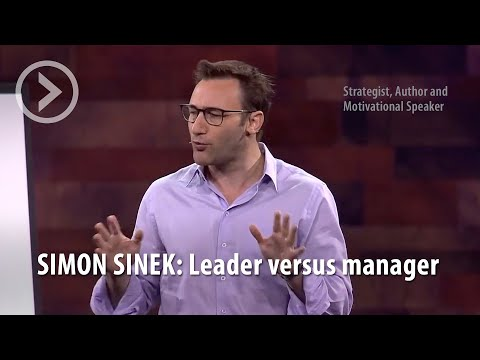

In [ ]:

YOUTUBE_ID = 'nSUJwmPQEyg'

YouTubeVideo(YOUTUBE_ID)

mistakes happened when people speak quickly slurred and saying abbreviation

In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio test.wav >> tedspeech.txt

[youtube] nSUJwmPQEyg: Downloading webpage
[download] Destination: test.m4a
[download] 100% of 3.38MiB in 00:49
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.9.3-models.pbmm
TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85
2022-08-12 01:54:53.400014: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loaded model in 0.0116s.
Loading scorer from files deepspeech-0.9.3-models.scorer
Loaded scorer in 0.000241s.
Running inference.
Inference took 148.553s for 219.080s audio file.


Read the output text file

In [ ]:
f = open('tedspeech.txt', 'r')
file_contents = f.read()
print (file_contents)

there are two things that i think that great leaders need to have empathy and perspective and i think these things are very often forgotten leaders are so often so concerned about their status of their position and organization they actually forget their real job and the real job of a leader is not about being in charge it's about taking care of those in our charge and i don't think people realize this and i don't think people train for this when word jeer are only responsibility is to be good at our jobs that's all that we really have to do and some people actually go get advanced education unowhat they can be really good at their job account one or whatever right and you show up and you work hard and the company will give us tons and tons of training how to do our jobs all shows how to use the software to send us away for a few days to get trained in whatever it is that we're doing for the company and then they expect us to go be good at our jobs and that's what we do we work very ha

Calculate word error rate

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
  
def generate_transcript(id):
	transcript = YouTubeTranscriptApi.get_transcript(id)
	script = ""

	for text in transcript:
		t = text["text"]
		if t != '[Music]':
			script += t + " "
		
	return script, len(script.split())

id = 'nSUJwmPQEyg'
transcript, no_of_words = generate_transcript(id)

!pip install jiwer
from jiwer import wer

ground_truth = transcript
hypothesis = file_contents

error = wer(ground_truth, hypothesis)
print(error)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.3 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149871 sha256=0d3ffaf4dd6835769c473c14da4d63a16135a467ab3cf2c70bba88258db77469
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein
0.12081513828238719


###Another audio but in noisy environment

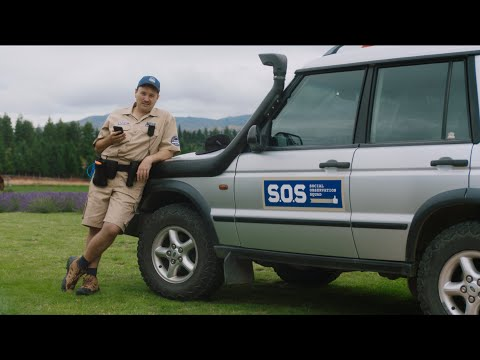

In [ ]:
YOUTUBE_ID = 'Trs-isdu4eE'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --output "test.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!deepspeech --model deepspeech-0.9.3-models.pbmm --scorer deepspeech-0.9.3-models.scorer --audio test.wav >> travelling.txt

[youtube] Trs-isdu4eE: Downloading webpage
[download] Destination: test.m4a
[download] 100% of 2.34MiB in 00:29
[ffmpeg] Correcting container in "test.m4a"
[ffmpeg] Destination: test.wav
Deleting original file test.m4a (pass -k to keep)
Loading model from file deepspeech-0.9.3-models.pbmm
TensorFlow: v2.3.0-6-g23ad988
DeepSpeech: v0.9.3-0-gf2e9c85
2022-08-12 01:59:27.181361: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Loaded model in 0.0151s.
Loading scorer from files deepspeech-0.9.3-models.scorer
Loaded scorer in 0.00029s.
Running inference.
Inference took 96.287s for 151.417s audio file.


Read the output text file

In [ ]:
f = open('travelling.txt', 'r')
file_contents = f.read()
print (file_contents)

even olinto situation the inevitable heartening to follow association and interaction of man you know them that tub the shop man sits quietly on the rock contemplate what douglas in the classic one in these parts the summit spread okayondonghsera osachile his landing a senlabor yet we all have but this summer we capitation traveling under the social intercourse he had to face trustfully lover a eyetalians der the warning go and enjoy the wine aragonese bikes and don't forget to see something or academical winterbottom there obliteration of a discontented troopers fortunately meditation all over gotteswerder switch it off well i just heard a confirmation that the levendale just see one of the most repeated scenes in all of social mediaevally me for dora combination the surely heard sometimes you know because there are some great other photos to take the sergius grandsons to know what you need to do it you need to get so the squire and trying aesayatyenenghdon pastepot but that rooidam



Calculate word error rate

In [ ]:
id = 'Trs-isdu4eE'
transcript, no_of_words = generate_transcript(id)
print (transcript)
ground_truth = transcript
hypothesis = file_contents

error = wer(ground_truth, hypothesis)
print(error)

oh i've been alluded to a situation it's been happening a lot lately people have been seeing those photos of social media and are going to great lengths to copy them i mean you know them hot tub back shot man sits quietly on the rock contemplating hot dog legs and the classic one in these parts the summit spread eagle okay easy does it slip lower those arms nice and slow that's it mate oscar charlie the eagle has landed hi guys i've seen all this before yeah we all have but this summer we're clamping down on anyone traveling under the social influence okay come on guys you've had your fun trust me you're gonna absolutely love it okay how about you two you can consider this a warning guys um enjoy the wineries on those bikes and don't forget to share something new okay we have a suspect travelling under the social influence at the lavender field copy that looks like lavender it's the fourth one we've had this week oh lavender we've missed them fedora switch it off well i just had a conf

## **Speech Recognition with QuartzNet**

In [ ]:
#@title
import os
from os.path import exists, join, basename, splitext
from IPython.display import YouTubeVideo

!pip -q install wget youtube-dl wget tensorboardX kaldi-io marshmallow num2words ruamel.yaml soundfile sox torch-stft unidecode
!pip install -q nemo-toolkit==0.9.0 nemo-asr==0.9.0 #--no-deps

# we need also Apex
if not exists('apex'):
  !git clone -q --depth 1 https://github.com/NVIDIA/apex
  !cd apex && pip install -q --no-cache-dir ./

     |████████████████████████████████| 1.9 MB 16.2 MB/s 
     |████████████████████████████████| 125 kB 56.2 MB/s 
     |████████████████████████████████| 116 kB 52.5 MB/s 
     |████████████████████████████████| 109 kB 59.9 MB/s 
     |████████████████████████████████| 235 kB 49.7 MB/s 
     |████████████████████████████████| 546 kB 21.2 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 13.1 MB 50.1 MB/s 
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
#@title
if not exists('quartznet15x5_multidataset'):
  # download the pretrained weights
  !wget -nc -q --show-progress -O quartznet15x5.zip https://api.ngc.nvidia.com/v2/models/nvidia/multidataset_quartznet15x5/versions/1/zip
  !unzip quartznet15x5.zip && mkdir quartznet15x5_multidataset && mv Jasper* quartznet15x5.yaml quartznet15x5_multidataset
  

quartznet15x5.zip   100%[===================>]  67.86M  24.2MB/s    in 2.8s    
Archive:  quartznet15x5.zip
  inflating: JasperDecoderForCTC-STEP-243800.pt  
  inflating: JasperEncoder-STEP-243800.pt  
  inflating: quartznet15x5.yaml      


In [ ]:
#@title
#
# this code is copied and modified from the NVIDIA/NeMo repo.
#

import json
from ruamel.yaml import YAML
import nemo
import nemo_asr

WORK_DIR = "/content/quartznet15x5_multidataset"
MODEL_YAML = "/content/quartznet15x5_multidataset/quartznet15x5.yaml"
CHECKPOINT_ENCODER = "/content/quartznet15x5_multidataset/JasperEncoder-STEP-243800.pt"
CHECKPOINT_DECODER = "/content/quartznet15x5_multidataset/JasperDecoderForCTC-STEP-243800.pt"
# Set this to True to enable beam search decoder
ENABLE_NGRAM = False
# This is only necessary if ENABLE_NGRAM = True. Otherwise, set to empty string
LM_PATH = "<PATH_TO_KENLM_BINARY>"

# Read model YAML
yaml = YAML(typ="safe")
with open(MODEL_YAML) as f:
    jasper_model_definition = yaml.load(f)
labels = jasper_model_definition['labels']

# Instantiate necessary Neural Modules
# Note that data layer is missing from here
neural_factory = nemo.core.NeuralModuleFactory(
    placement=nemo.core.DeviceType.CPU,
    backend=nemo.core.Backend.PyTorch)
data_preprocessor = nemo_asr.AudioToMelSpectrogramPreprocessor(factory=neural_factory)
jasper_encoder = nemo_asr.JasperEncoder(
    jasper=jasper_model_definition['JasperEncoder']['jasper'],
    activation=jasper_model_definition['JasperEncoder']['activation'],
    feat_in=jasper_model_definition['AudioToMelSpectrogramPreprocessor']['features'])
jasper_encoder.restore_from(CHECKPOINT_ENCODER, local_rank=0)
jasper_decoder = nemo_asr.JasperDecoderForCTC(
    feat_in=1024,
    num_classes=len(labels))
jasper_decoder.restore_from(CHECKPOINT_DECODER, local_rank=0)
greedy_decoder = nemo_asr.GreedyCTCDecoder()

def wav_to_text(manifest, greedy=True):
    from ruamel.yaml import YAML
    yaml = YAML(typ="safe")
    with open(MODEL_YAML) as f:
        jasper_model_definition = yaml.load(f)
    labels = jasper_model_definition['labels']

    # Instantiate necessary neural modules
    data_layer = nemo_asr.AudioToTextDataLayer(
        shuffle=False,
        manifest_filepath=manifest,
        labels=labels, batch_size=1)

    # Define inference DAG
    audio_signal, audio_signal_len, _, _ = data_layer()
    processed_signal, processed_signal_len = data_preprocessor(
        input_signal=audio_signal,
        length=audio_signal_len)
    encoded, encoded_len = jasper_encoder(audio_signal=processed_signal,
                                          length=processed_signal_len)
    log_probs = jasper_decoder(encoder_output=encoded)
    predictions = greedy_decoder(log_probs=log_probs)

    if ENABLE_NGRAM:
        print('Running with beam search')
        beam_predictions = beam_search_with_lm(
            log_probs=log_probs, log_probs_length=encoded_len)
        eval_tensors = [beam_predictions]

    if greedy:
        eval_tensors = [predictions]

    tensors = neural_factory.infer(tensors=eval_tensors)
    if greedy:
        from nemo_asr.helpers import post_process_predictions
        prediction = post_process_predictions(tensors[0], labels)
    else:
        prediction = tensors[0][0][0][0][1]
    return prediction

def create_manifest(file_path):
    # create manifest
    manifest = dict()
    manifest['audio_filepath'] = file_path
    manifest['duration'] = 18000
    manifest['text'] = 'todo'
    with open(file_path+".json", 'w') as fout:
        fout.write(json.dumps(manifest))
    return file_path+".json"

INFO:root:PADDING: 16
2022-08-12 01:48:52,425 - INFO - PADDING: 16


STFT using torch


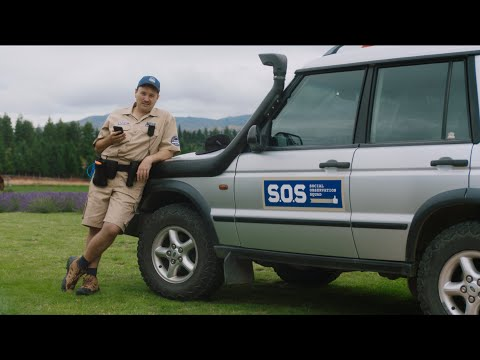

In [ ]:
#@title
YOUTUBE_ID = 'Trs-isdu4eE'


YouTubeVideo(YOUTUBE_ID)

Converting speech to text

In [ ]:
#@title
!rm -rf *.wav
!youtube-dl --extract-audio --audio-format wav --quiet --output "downloaded.%(ext)s" https://www.youtube.com/watch\?v\={YOUTUBE_ID}
!ffmpeg -loglevel panic -y -i downloaded.wav -acodec pcm_s16le -ac 1 -ar 16000 test.wav

travelling = wav_to_text(create_manifest('test.wav'))

print('\n\n')
print(travelling)

INFO:root:Dataset loaded with 5.00 hours. Filtered 0.00 hours.
2022-08-12 02:06:06,795 - INFO - Dataset loaded with 5.00 hours. Filtered 0.00 hours.
INFO:root:Evaluating batch 0 out of 1
2022-08-12 02:06:06,819 - INFO - Evaluating batch 0 out of 1





["e've been a little to situationit'sep have been seeing thost photos of social media and i going to greatly to stacovinamnyou know them hot tub backshot man sits quietly on the rock contemplating hot dog liks in the clisic one in these parts the summit sprety hy gus i've seen all this before yeh we all have but this summer we're clamping down on anyone traveling under the sushankilmo gos you hate your fater just ma o you too ye can consider this a warning guyy am enjoy the winereats on those bikes and don't forget to share somethinkeri foeseridorswitcitof li just haid a confirmation that the lavender loutrers just shared one of the most replicated scenes in all of social medium they um follow me for dora combinnecause there are so many great other photos to take teside o usual graim shoks what you need to do is you need to think outsomete squv or tryingc"]


Calculate word error rate of QuartzNet model

In [ ]:
ground_truth = transcript
hypothesis = travelling

error = wer(ground_truth, hypothesis)
print(error)

0.5962962962962963
